In [3]:
pip install python-okx

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.11.3
    Uninstalling importlib-metadata-4.11.3:
      Successfully uninstalled importlib-metadata-4.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
fiona 1.9.5 requires click~=8.0, but you have click 7.1.2 which is incompatible.
poetry 1.3.2 requires importlib-metadata<5.0,>=4.4; python_version < "3.10", but you have importlib-metadata 7.0.1 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install okx

  Using cached requests-2.31.0-py3-none-any.whl.metadata (4.6 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 493.0 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.1/135.1 kB 898.4 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 1.8 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 4.0 MB/s eta 0:00:0000:0100:01
Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Attempting uninstall: requests
    Found existing installation: requests 2.27.1
    Uninstalling requests-2.27.1:
      Successfully uninstalled requests-2.27.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.2
    Uninstalling numpy-1.22.2:
      Successfully uninstalled numpy-1.22.2
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2
ERROR: pip's dependency resolver does not currently take

In [3]:
from okx.api import Account
from okx.api import Trade
from okx_api import Market as Market_api
from pprint import pprint
import json
import os
import time
import math
from dotenv import load_dotenv
from okx.app import OkxSPOT
load_dotenv()

True

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.api as smt 
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.metrics import mean_absolute_error, mean_squared_error
from datetime import datetime

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
market = Market_api(key = '', secret = '', passphrase = '', flag = '0')
okxSPOT = OkxSPOT(
    key="",
    secret="",
    passphrase="",
)

In [6]:
print(market.get_history_candles.__doc__)


        https://www.okx.com/docs-v5/zh/#rest-api-market-data-get-candlesticks-history

        请求参数：
        Parameter         	Type    	Required	Description
        instId            	String  	是       	产品ID，如BTC-USD-200927
        after             	String  	否       	请求此时间戳之前（更旧的数据）的分页内容，传的值为对应接口的ts
        before            	String  	否       	请求此时间戳之后（更新的数据）的分页内容，传的值为对应接口的ts
        bar               	String  	否       	时间粒度，默认值1m如 /3m/5m/15m/30m/1H/2H/4H]香港时间开盘价k线：[6H/12H/1D/2D/3D/1W/1M/3M]UTC时间开盘价k线：[6Hutc/12Hutc/1Dutc/2Dutc/3Dutc/1Wutc/1Mutc/3Mutc]
        limit             	String  	否       	分页返回的结果集数量，最大为100，不填默认返回100条
        


In [65]:
# https://www.okx.com/docs-v5/zh/?python#order-book-trading-market-data-get-candlesticks-history
columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'volCcy', 'volCcyQuote', 'confirm']
date_string_after = ['2023-1-31','2023-2-28','2023-3-31','2023-4-30','2023-5-31','2023-6-30',
                     '2023-7-31','2023-8-31','2023-9-30','2023-10-31','2023-11-30','2023-12-31']
full_data = pd.DataFrame(columns = ['open', 'high', 'low', 'close'])

for m in range(8, 13):
    
    month = "2023-" + str(m) + "-1"
    time_before = datetime.strptime(month, "%Y-%m-%d").timestamp()
    time_after = datetime.strptime(date_string_after[m - 1], "%Y-%m-%d").timestamp()

    result = market.get_history_candles(
        instId =  'BTC-USDT',
        before = str(round(time_before * 1000)), after = str(round(time_after * 1000)), 
        bar = '1D'
    )
    # print(len(result['data']))
    data = pd.DataFrame(result['data'], columns = columns)
    data['date'] = pd.to_datetime(data['timestamp'], unit = 'ms')
    data.sort_values(by = 'date', inplace = True)
    data.set_index('date', inplace = True)
    data[['open', 'high', 'low', 'close']] = data[['open', 'high', 'low', 'close']].apply(pd.to_numeric)
    data.drop(['volume', 'timestamp', 'confirm', 'volCcyQuote', 'volCcy'], axis = 1, inplace = True)
    full_data = pd.concat([full_data, data])
    # print(data)
    # arima_data = data["open"]
    
print(full_data)

                            open     high      low    close
2023-08-01 16:00:08.192  28951.7  30039.6  28862.1  29324.0
2023-08-02 15:59:44.640  29324.0  29430.4  28923.8  29258.6
2023-08-03 15:59:21.088  29258.6  29371.3  29100.0  29272.1
2023-08-04 15:58:57.536  29272.0  29285.3  28802.2  29039.9
2023-08-05 16:00:45.056  29040.0  29137.3  28989.6  29009.0
...                          ...      ...      ...      ...
2023-12-25 15:59:37.472  43616.8  43718.5  42111.0  42392.8
2023-12-26 15:59:13.920  42392.8  43227.7  41610.0  42977.9
2023-12-27 16:01:01.440  42979.6  43788.6  42398.0  42444.9
2023-12-28 16:00:37.888  42445.2  43113.6  42105.3  42266.2
2023-12-29 16:00:14.336  42266.1  42449.6  41267.1  42374.8

[143 rows x 4 columns]


<AxesSubplot: >

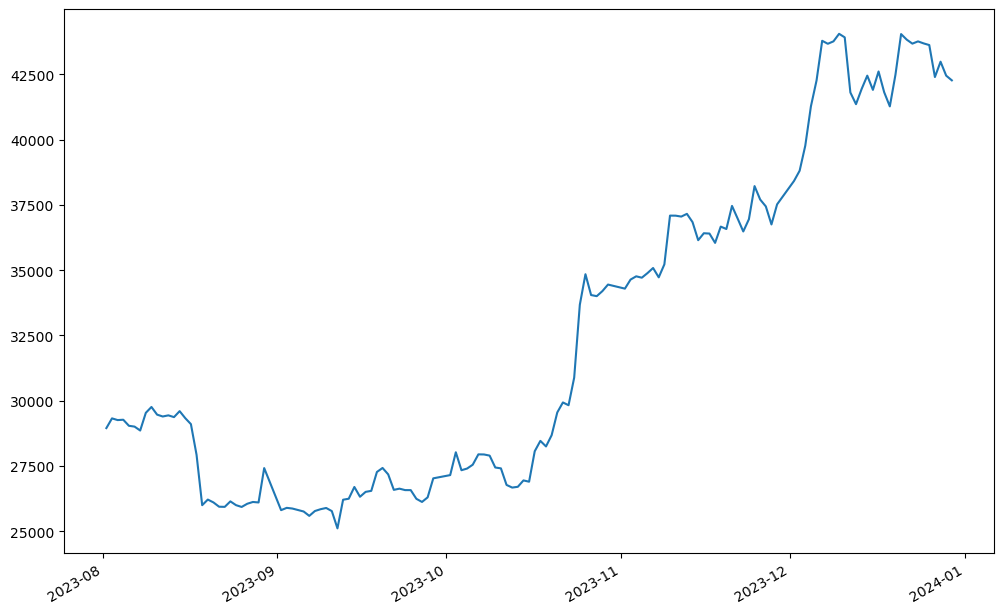

In [57]:
full_data['open'].plot(figsize = (12,8))

### There are four plots, each means:
1. open price
2. long-term trend
3. seasonal
4. residual

<Figure size 640x480 with 0 Axes>

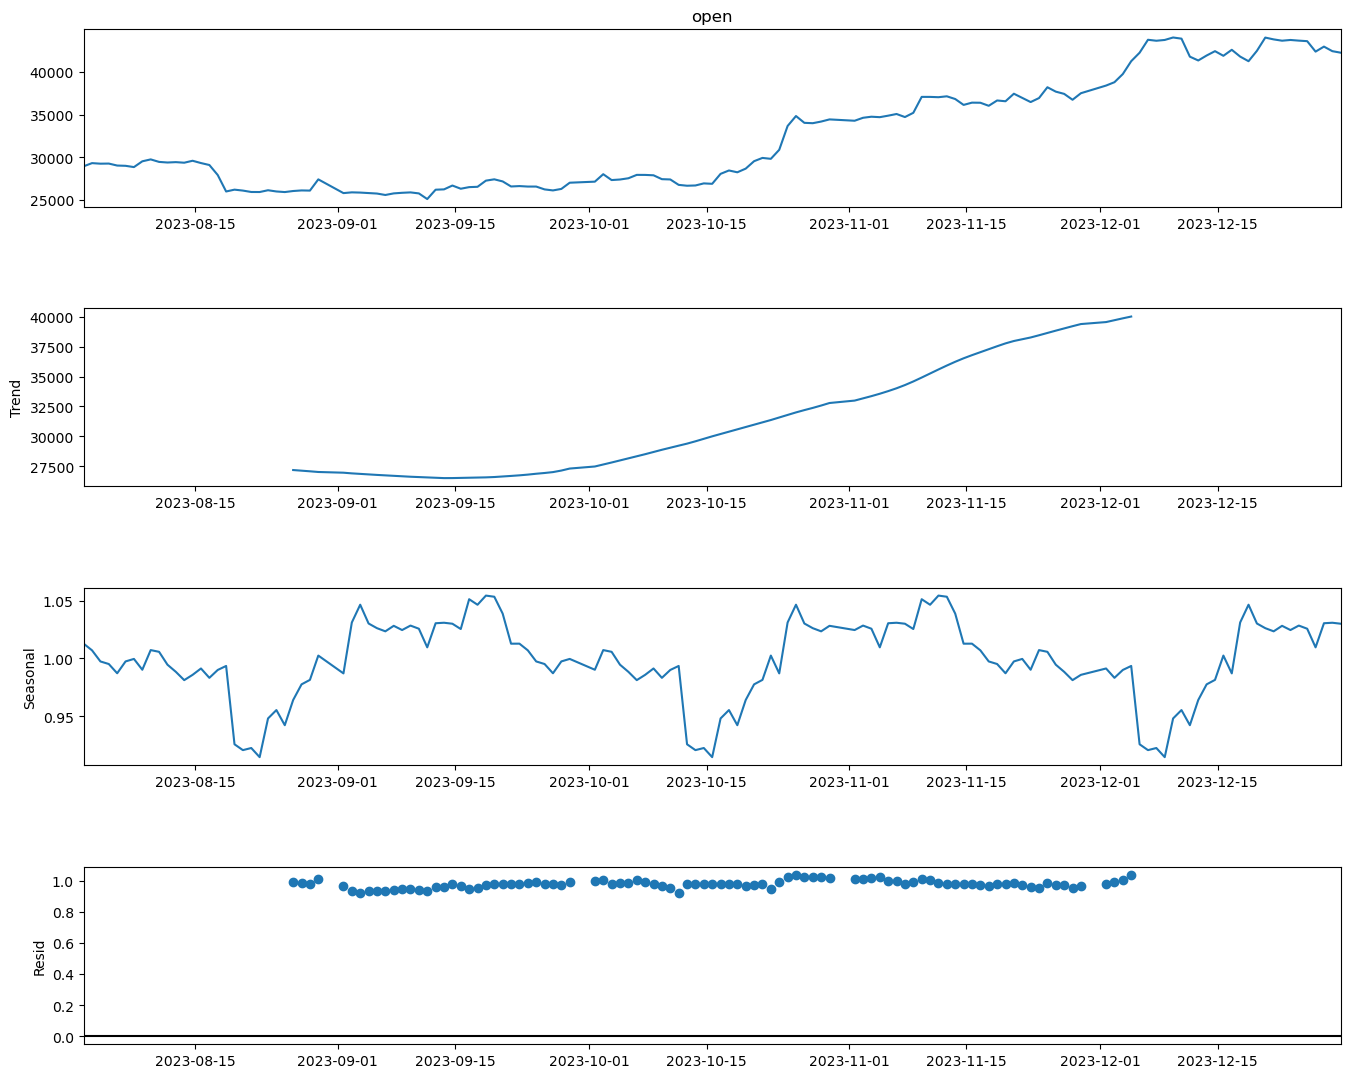

In [58]:
result_add = seasonal_decompose(full_data['open'], model = 'multiplicative', period = 50)
with plt.rc_context({'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    fig = plt.figure()  
    fig = result_add.plot()  
    fig.set_size_inches(15, 12)

## Stationary test: Dickey-Fuller

In [59]:
def adf_test(timeseries):
    
    print("Results of Dickey-Fuller Test\n================================================")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = [
        "Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key, value in dftest[4].items():
        dfoutput["Criterical Value (%s)"%key] = value
    print(dfoutput)
    print("================================================")  
    #寫個自動判斷式
    if dfoutput[0] < dfoutput[4]:
        print("The data is stationary. (Criterical Value 1%)")  
    elif dfoutput[0] < dfoutput[5]:
        print("The data is stationary. (Criterical Value 5%)") 
    elif dfoutput[0] < dfoutput[6]:
        print("The data is stationary. (Criterical Value 10%)")
    else:
        print("The data is non-stationary, so do differencing!")
        
adf_test(full_data['open'])

Results of Dickey-Fuller Test
Test Statistic                   0.025542
p-value                          0.960594
#Lags Used                       1.000000
Number of Observations Used    141.000000
Criterical Value (1%)           -3.477601
Criterical Value (5%)           -2.882266
Criterical Value (10%)          -2.577822
dtype: float64
The data is non-stationary, so do differencing!


Results of Dickey-Fuller Test
Test Statistic                -9.989234e+00
p-value                        2.016767e-17
#Lags Used                     0.000000e+00
Number of Observations Used    1.410000e+02
Criterical Value (1%)         -3.477601e+00
Criterical Value (5%)         -2.882266e+00
Criterical Value (10%)        -2.577822e+00
dtype: float64
The data is stationary. (Criterical Value 1%)


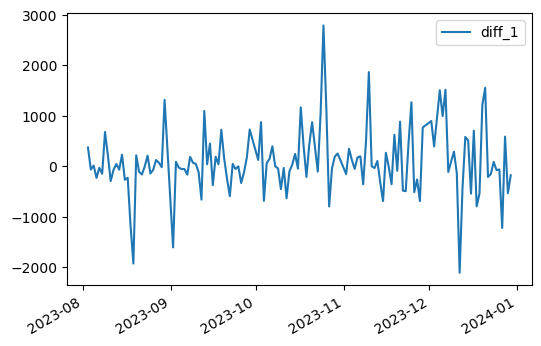

In [198]:
# First-order differencing, subtracting the data from the previous day

diff_1 = full_data['open'] - full_data['open'].shift(1) 
diff_1 = diff_1.dropna()
diff_1.head()
diff_1.plot(figsize = (6, 4), label = "diff_1")
plt.legend()

adf_test(diff_1)

### You can choose the params by using:
- ACF(Autocorrelation Function)
- PACF(Partial Autocorrelation Function)
- AIC(Akaike Information Criterion)
- BIC(Bayesian Information Criterion)
- MSE(Mean Square Error)
- MAE(Mean Absolute Error)

### AIC / PACF

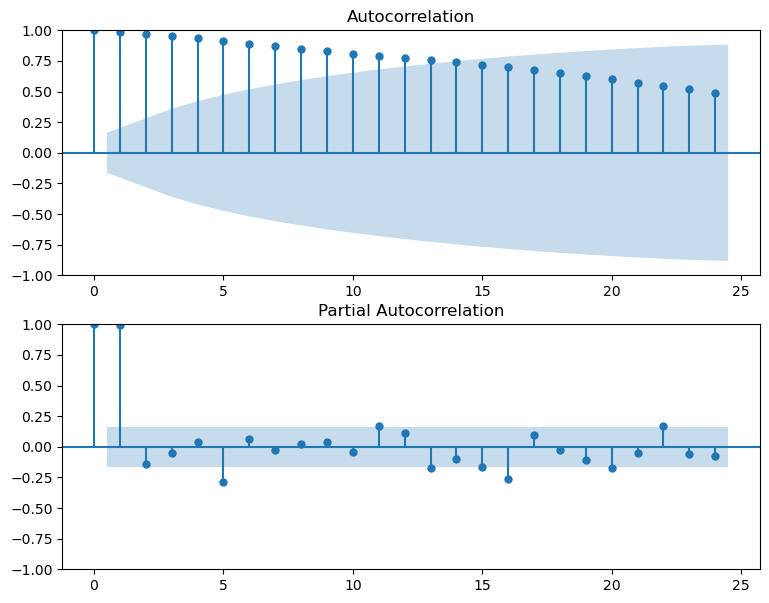

In [61]:
fig = plt.figure(facecolor = "white", figsize = (9,7))
ax1 = fig.add_subplot(211)
plot_acf(full_data['open'], lags = 24, ax = ax1)
ax2 = fig.add_subplot(212)
plot_pacf(full_data['open'], lags = 24, ax = ax2)
plt.show()

In [134]:
def arima_AIC(data, p = 4, d = 4, q = 4):
    # MSE
    period = 1
    L = len(data)
    train = data[ : (L - period)]
    test = data[ - period: ]
    mse_r = []
    # AIC
    best_pdq =["AIC_pdq", 10000, "MSE", 10000]
    AIC = []
    name = []
    
    for i in range(p): # AR
        
        for j in range(1, d): # I
            
            for k in range(q): # MA
                
                model = sm.tsa.arima.ARIMA(data, order = (i,j,k))
                fitted = model.fit()
                
                # MSE
                forecast = fitted.forecast(step = period, alpha = 0.05)
                mse = mean_squared_error(test, forecast)
                mse_r.append(mse)
                # AIC
                AIC.append(fitted.aic)
                name.append(f"ARIMA({i},{j},{k})")
                
                print(f"ARIMA({i},{j},{k})：AIC = {fitted.aic}, MSE = {mse}")
                
                if fitted.aic < best_pdq[1]:
                    
                    best_pdq[0] = f"ARIMA({i}, {j}, {k})"
                    best_pdq[1] = fitted.aic
                    
                if mse < best_pdq[1]:
                    
                    best_pdq[2] = f"ARIMA({i}, {j}, {k})"
                    best_pdq[3] = mse
                    
                
    print("==========================================================================")
    print(f"This best model is {best_pdq[0]} based on argmin AIC.")
    print(f"This best model is {best_pdq[2]} based on argmin MSE.")

arima_AIC(full_data['open'], 4,4,4)

ARIMA(0,1,0)：AIC = 2245.82820397719, MSE = 0.0
ARIMA(0,1,1)：AIC = 2244.166066720713, MSE = 150.63074376714368
ARIMA(0,1,2)：AIC = 2246.1965254298484, MSE = 7.175698391279023
ARIMA(0,1,3)：AIC = 2248.0464283896567, MSE = 0.31124554609423144
ARIMA(0,2,0)：AIC = 2300.3403789904146, MSE = 32076.809999999477
ARIMA(0,2,1)：AIC = 2288.8670203892516, MSE = 50119.71160856168
ARIMA(0,2,2)：AIC = 2280.3095779523155, MSE = 8679.128968601104
ARIMA(0,2,3)：AIC = 2280.0706749523547, MSE = 18811.428154188514
ARIMA(0,3,0)：AIC = 2427.176220434606, MSE = 31046.440000001538
ARIMA(0,3,1)：AIC = 2307.211178054078, MSE = 48748.95409894981
ARIMA(0,3,2)：AIC = 2300.4187053705773, MSE = 74928.02491057783
ARIMA(0,3,3)：AIC = 2296.4337901940626, MSE = 20421.65348647284
ARIMA(1,1,0)：AIC = 2244.2731340994014, MSE = 357.30735071174473
ARIMA(1,1,1)：AIC = 2246.106251158517, MSE = 7.658099770987842
ARIMA(1,1,2)：AIC = 2248.1936224690253, MSE = 6.51347533529912
ARIMA(1,1,3)：AIC = 2247.2912123883143, MSE = 1664.0378140140888
ARIMA

## This is for real prediction

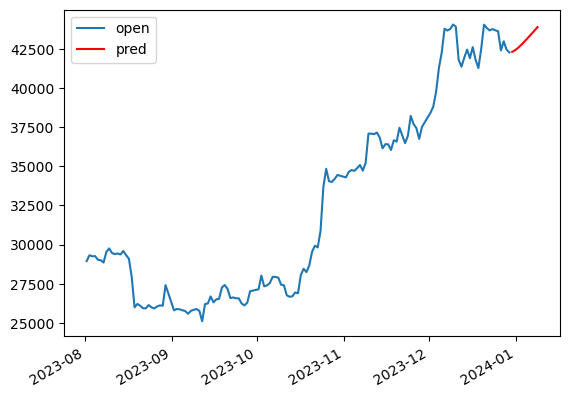

143    42304.522747
144    42406.005028
145    42545.612706
146    42711.773416
147    42893.396001
148    43083.858576
149    43279.539764
150    43478.308001
151    43678.891398
152    43880.541953
Name: predicted_mean, dtype: float64


In [143]:
model = sm.tsa.ARIMA(full_data['open'], order=(3, 2, 1))
fitted = model.fit()

# Plotting the historical data
fig, ax = plt.subplots()
ax = full_data['open'].plot(ax = ax)

number_of_steps = 10
forecast = fitted.forecast(steps = number_of_steps)

# Create predict date
last_date = full_data.index[-1]
forecast_index = pd.date_range(start = last_date, periods = number_of_steps + 1, freq = 'D')[1:]

forecast_index

ax.plot(forecast_index, forecast, color = 'red', label = 'pred')

plt.legend()
plt.show()

print(forecast)

## This is for testing the data

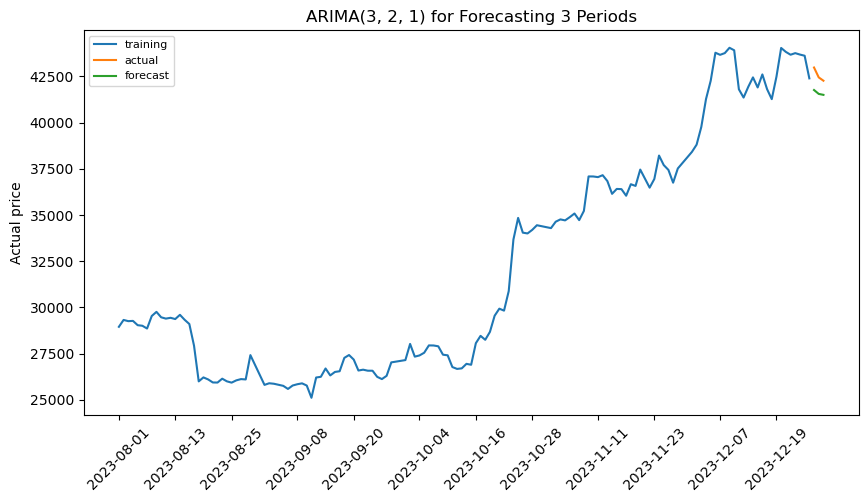

Mean Absolute Error : 958.8414316134562
Mean Squared Error : 955604.0773098655
forcast:
2023-12-27 16:01:01.440    41761.979773
2023-12-28 16:00:37.888    41551.592447
2023-12-29 16:00:14.336    41500.803486
dtype: float64
Actual
2023-12-27 16:01:01.440    42979.6
2023-12-28 16:00:37.888    42445.2
2023-12-29 16:00:14.336    42266.1
Name: open, dtype: float64


In [196]:
# Data spilt
period = 3
title = f'ARIMA(3, 2, 1) for Forecasting {period} Periods'
L = len(full_data['open'])
x_train = full_data['open'][ : (L - period)]
x_test = full_data['open'][ - period: ]

# Build Model 
model = sm.tsa.ARIMA(x_train, order = (3, 2, 1)) 
fitted = model.fit()
forecast = fitted.forecast(steps = period, alpha = 0.05) # 95% conf

# Make as pandas series
fc_series = pd.Series(forecast.values, index = x_test.index)

# Plot
plt.figure(figsize = (10, 5), dpi = 100)
plt.plot(x_train, label = 'training')
plt.plot(x_test, label = 'actual')
plt.plot(fc_series, label = 'forecast')
plt.xticks(full_data['open'].index[ ::12], rotation = 45)
plt.title(title)
plt.ylabel("Actual price")
plt.legend(loc = 'upper left', fontsize = 8)
plt.show()

# Results
print(f"Mean Absolute Error : {mean_absolute_error(fc_series, x_test)}")
print(f"Mean Squared Error : {mean_squared_error(fc_series, x_test)}")
print("===========================") 
print("forcast:")
print(fc_series)
print("===========================")
print("Actual")
print(x_test)

In [197]:
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   open   No. Observations:                  140
Model:                 ARIMA(3, 2, 1)   Log Likelihood               -1110.641
Date:                Mon, 29 Jan 2024   AIC                           2231.282
Time:                        13:47:06   BIC                           2245.918
Sample:                             0   HQIC                          2237.229
                                - 140                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5865      0.046     12.668      0.000       0.496       0.677
ar.L2         -0.0620      0.041     -1.514      0.130      -0.142       0.018
ar.L3          0.0433      0.043      1.018      0.309      -0.040       0.127
ma.L1         -1.0000      0.099    -10.109      0.000      -1.194      -0.806
sigma2      4.866e+05   2.04e-07   2.39e+12      0.000    4.87e+05    4.87e+05
===================================================================================
Ljung-Box (L1) (Q):                   3.27   Jarque-Bera (JB):                 2.96
Prob(Q):                              0.07   Prob(JB):                         0.23
Heteroskedasticity (H):               0.96   Skew:                            -0.10
Prob(H) (two-sided):                  0.90   Kurtosis:                         3.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.05e+26. Standard errors may be unstable.
"""